In [2]:
# from google.colab import drive
# drive.mount('/content/drive')

Mounted at /content/drive


## 1. AdaBoost

### Import libraries <a class="anchor" id="6.1"></a>

In [1]:
import numpy as np
import pandas as pd

### Load dataset <a class="anchor" id="6.2"></a>

In [12]:
col_names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'type']
iris = pd.read_csv("iris.csv", skiprows=1, header=None, names=col_names)

### EDA <a class="anchor" id="6.3"></a>

In [13]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,type
1,5.1,3.5,1.4,0.2,0
2,4.9,3.0,1.4,0.2,0
3,4.7,3.2,1.3,0.2,0
4,4.6,3.1,1.5,0.2,0
5,5.0,3.6,1.4,0.2,0


### View summary of dataframe

In [14]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150 entries, 1 to 150
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   type          150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 7.0 KB


### Declare feature vector and target variable

In [16]:
X = iris[['sepal_length','sepal_width','petal_length','petal_width']]

X.head()

,sepal_length,sepal_width,petal_length,petal_width
1,5.1,3.5,1.4,0.2
2,4.9,3.0,1.4,0.2
3,4.7,3.2,1.3,0.2
4,4.6,3.1,1.5,0.2
5,5.0,3.6,1.4,0.2


In [17]:
y = iris['type']

y.head()

1    0
2    0
3    0
4    0
5    0
Name: type, dtype: int64

### Split dataset into training set and test set <a class="anchor" id="6.4"></a>

In [18]:
# Import train_test_split function
from sklearn.model_selection import train_test_split

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

### Build the AdaBoost model <a class="anchor" id="6.5"></a>

In [19]:
# Import the AdaBoost classifier
from sklearn.ensemble import AdaBoostClassifier


# Create adaboost classifer object
abc = AdaBoostClassifier(n_estimators=50, learning_rate=1, random_state=0)

# Train Adaboost Classifer
model1 = abc.fit(X_train, y_train)


#Predict the response for test dataset
y_pred = model1.predict(X_test)

### Create Adaboost Classifier

- The most important parameters are `base_estimator`, `n_estimators` and `learning_rate`.

- **base_estimator** is the learning algorithm to use to train the weak models. This will almost always not needed to be changed because by far the most common learner to use with AdaBoost is a decision tree – this parameter’s default argument.

- **n_estimators** is the number of models to iteratively train.

- **learning_rate** is the contribution of each model to the weights and defaults to 1. Reducing the learning rate will mean the weights will be increased or decreased to a small degree, forcing the model train slower (but sometimes resulting in better performance scores).

- **loss** is exclusive to AdaBoostRegressor and sets the loss function to use when updating weights. This defaults to a linear loss function however can be changed to square or exponential.

### Evaluate Model <a class="anchor" id="6.6"></a>

Let's estimate, how accurately the classifier or model can predict the type of cultivars.

In [20]:
#import scikit-learn metrics module for accuracy calculation
from sklearn.metrics import accuracy_score


# calculate and print model accuracy
print("AdaBoost Classifier Model Accuracy:", accuracy_score(y_test, y_pred))

AdaBoost Classifier Model Accuracy: 0.9555555555555556


### Further evaluation with SVC base estimator <a class="anchor" id="6.7"></a>


- For further evaluation, we will use SVC as a base estimator as follows:

In [21]:
# load required classifer
from sklearn.ensemble import AdaBoostClassifier


# import Support Vector Classifier
from sklearn.svm import SVC


# import scikit-learn metrics module for accuracy calculation
from sklearn.metrics import accuracy_score
svc=SVC(probability=True, kernel='linear')


# create adaboost classifer object
abc =AdaBoostClassifier(n_estimators=50, base_estimator=svc,learning_rate=1, random_state=0)


# train adaboost classifer
model2 = abc.fit(X_train, y_train)


# predict the response for test dataset
y_pred = model2.predict(X_test)


# calculate and print model accuracy
print("Model Accuracy with SVC Base Estimator:",accuracy_score(y_test, y_pred))


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Model Accuracy with SVC Base Estimator: 0.9333333333333333


## 2. Random Forest

In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [24]:
data = 'drive/MyDrive/230814/car_evaluation.csv'

df = pd.read_csv(data, header=None)

In [25]:
df.shape

(1728, 7)

In [26]:
df.head()

,0,1,2,3,4,5,6
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [27]:
col_names = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']


df.columns = col_names

col_names

['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']

In [28]:
df.head()

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   buying    1728 non-null   object
 1   maint     1728 non-null   object
 2   doors     1728 non-null   object
 3   persons   1728 non-null   object
 4   lug_boot  1728 non-null   object
 5   safety    1728 non-null   object
 6   class     1728 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


In [30]:
col_names = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']


for col in col_names:
    print(df[col].value_counts())

vhigh    432
high     432
med      432
low      432
Name: buying, dtype: int64
vhigh    432
high     432
med      432
low      432
Name: maint, dtype: int64
2        432
3        432
4        432
5more    432
Name: doors, dtype: int64
2       576
4       576
more    576
Name: persons, dtype: int64
small    576
med      576
big      576
Name: lug_boot, dtype: int64
low     576
med     576
high    576
Name: safety, dtype: int64
unacc    1210
acc       384
good       69
vgood      65
Name: class, dtype: int64


In [31]:
df['class'].value_counts()

unacc    1210
acc       384
good       69
vgood      65
Name: class, dtype: int64

In [32]:
df.isnull().sum()

buying      0
maint       0
doors       0
persons     0
lug_boot    0
safety      0
class       0
dtype: int64

#### Declare feature vector and target variable

In [33]:
X = df.drop(['class'], axis=1)

y = df['class']

#### Split data into separate training and test set

In [34]:
# split data into training and testing sets

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)

In [35]:
X_train.shape, X_test.shape

((1157, 6), (571, 6))

#### Feature Engineering

In [36]:
X_train.dtypes

buying      object
maint       object
doors       object
persons     object
lug_boot    object
safety      object
dtype: object

In [37]:
X_train.head()

,buying,maint,doors,persons,lug_boot,safety
48,vhigh,vhigh,3,more,med,low
468,high,vhigh,3,4,small,low
155,vhigh,high,3,more,small,high
1721,low,low,5more,more,small,high
1208,med,low,2,more,small,high


#### We can see that all the variables are ordinal categorical data type.

In [ ]:
import category_encoders as ce

In [39]:
!pip install category_encoders

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 1.4 MB/s eta 0:00:00


In [40]:
import category_encoders as ce

In [41]:
# encode categorical variables with ordinal encoding

encoder = ce.OrdinalEncoder(cols=['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety'])


X_train = encoder.fit_transform(X_train)
X_test = encoder.transform(X_test)

In [42]:
X_train.head()

,buying,maint,doors,persons,lug_boot,safety
48,1,1,1,1,1,1
468,2,1,1,2,2,1
155,1,2,1,1,2,2
1721,3,3,2,1,2,2
1208,4,3,3,1,2,2


#### Random Forest Classifier model with default parameters

In [43]:
# import Random Forest classifier

from sklearn.ensemble import RandomForestClassifier



# instantiate the classifier

rfc = RandomForestClassifier(random_state=0)



# fit the model

rfc.fit(X_train, y_train)



# Predict the Test set results

y_pred = rfc.predict(X_test)



# Check accuracy score

from sklearn.metrics import accuracy_score

print('Model accuracy score with 10 decision-trees : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with 10 decision-trees : 0.9457


#### Random Forest Classifier model with parameter n_estimators=100

In [44]:
# instantiate the classifier with n_estimators = 100

rfc_100 = RandomForestClassifier(n_estimators=100, random_state=0)



# fit the model to the training set

rfc_100.fit(X_train, y_train)



# Predict on the test set results

y_pred_100 = rfc_100.predict(X_test)



# Check accuracy score

print('Model accuracy score with 100 decision-trees : {0:0.4f}'. format(accuracy_score(y_test, y_pred_100)))

Model accuracy score with 100 decision-trees : 0.9457


#### Find important features with Random Forest model

In [45]:
# create the classifier with n_estimators = 100

clf = RandomForestClassifier(n_estimators=100, random_state=0)



# fit the model to the training set

clf.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

In [46]:
# view the feature scores

feature_scores = pd.Series(clf.feature_importances_, index=X_train.columns).sort_values(ascending=False)

feature_scores

safety      0.295319
persons     0.233856
buying      0.151734
maint       0.146653
lug_boot    0.100048
doors       0.072389
dtype: float64

#### Visualize feature scores of the features

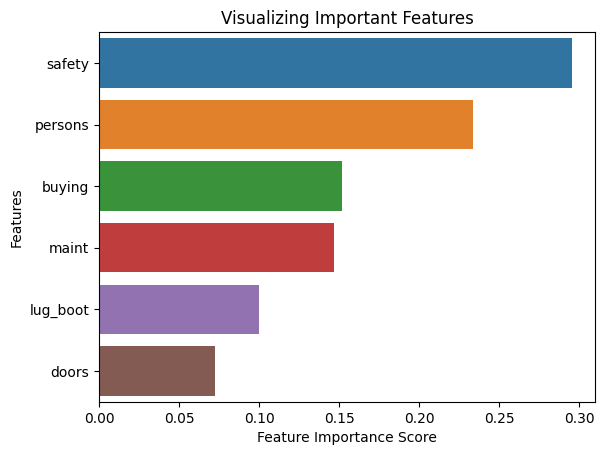

In [47]:
# Creating a seaborn bar plot

sns.barplot(x=feature_scores, y=feature_scores.index)



# Add labels to the graph

plt.xlabel('Feature Importance Score')

plt.ylabel('Features')



# Add title to the graph

plt.title("Visualizing Important Features")



# Visualize the graph

plt.show()

#### Build Random Forest model on selected features

In [48]:
# declare feature vector and target variable

X = df.drop(['class', 'doors'], axis=1)

y = df['class']

In [49]:
# split data into training and testing sets

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)

In [50]:
# encode categorical variables with ordinal encoding

encoder = ce.OrdinalEncoder(cols=['buying', 'maint', 'persons', 'lug_boot', 'safety'])


X_train = encoder.fit_transform(X_train)

X_test = encoder.transform(X_test)

In [51]:
# instantiate the classifier with n_estimators = 100

clf = RandomForestClassifier(random_state=0)



# fit the model to the training set

clf.fit(X_train, y_train)


# Predict on the test set results

y_pred = clf.predict(X_test)



# Check accuracy score

print('Model accuracy score with doors variable removed : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with doors variable removed : 0.9264


#### Confusion matrix

In [ ]:
# Print the Confusion Matrix and slice it into four pieces

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

print('Confusion matrix\n\n', cm)

#### Classification Report

In [52]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         acc       0.89      0.81      0.85       129
        good       0.56      0.90      0.69        20
       unacc       0.97      0.97      0.97       397
       vgood       0.80      0.80      0.80        25

    accuracy                           0.93       571
   macro avg       0.81      0.87      0.83       571
weighted avg       0.93      0.93      0.93       571



## 3. XGBoost

In [54]:
!pip install optuna

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 404.2/404.2 kB 4.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 225.3/225.3 kB 7.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.7/78.7 kB 7.4 MB/s eta 0:00:00


In [56]:
import xgboost as xgb

from sklearn.model_selection import train_test_split
from sklearn.datasets import load_diabetes

In [57]:
seed = 123
test_size = 0.2
colsample_bytree = 0.3
learning_rate = 0.01
max_depth = 15
alpha = 10
n_estimators = 5

In [60]:
X, y = load_diabetes(return_X_y = True, as_frame = True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=seed)

In [61]:
xg_reg = xgb.XGBRegressor(objective ='reg:squarederror',
    colsample_bytree = colsample_bytree,
    learning_rate = learning_rate,
    max_depth = max_depth,
    alpha = alpha,
    n_estimators = n_estimators)

In [62]:
xg_reg.fit(X_train, y_train)


XGBRegressor(alpha=10, base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.3, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.01, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=15, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=5, n_jobs=None, num_parallel_tree=None,
             predictor=None, ...)

In [63]:
preds = xg_reg.predict(X_test)

## Optuna

In [64]:
!pip install optuna

In [65]:
import numpy as np
import optuna

import sklearn.datasets
import sklearn.metrics
from sklearn.model_selection import train_test_split
import xgboost as xgb

In [66]:
def objective(trial):
    (data, target) = sklearn.datasets.load_breast_cancer(return_X_y=True)
    train_x, valid_x, train_y, valid_y = train_test_split(data, target, test_size=0.25)
    dtrain = xgb.DMatrix(train_x, label=train_y)
    dvalid = xgb.DMatrix(valid_x, label=valid_y)

    param = {
        "verbosity": 0,
        "objective": "binary:logistic",
        # use exact for small dataset.
        "tree_method": "exact",
        # defines booster, gblinear for linear functions.
        "booster": trial.suggest_categorical("booster", ["gbtree", "gblinear", "dart"]),
        # L2 regularization weight.
        "lambda": trial.suggest_float("lambda", 1e-8, 1.0, log=True),
        # L1 regularization weight.
        "alpha": trial.suggest_float("alpha", 1e-8, 1.0, log=True),
        # sampling ratio for training data.
        "subsample": trial.suggest_float("subsample", 0.2, 1.0),
        # sampling according to each tree.
        "colsample_bytree": trial.suggest_float("colsample_bytree", 0.2, 1.0),
    }

    if param["booster"] in ["gbtree", "dart"]:
        # maximum depth of the tree, signifies complexity of the tree.
        param["max_depth"] = trial.suggest_int("max_depth", 3, 9, step=2)
        # minimum child weight, larger the term more conservative the tree.
        param["min_child_weight"] = trial.suggest_int("min_child_weight", 2, 10)
        param["eta"] = trial.suggest_float("eta", 1e-8, 1.0, log=True)
        # defines how selective algorithm is.
        param["gamma"] = trial.suggest_float("gamma", 1e-8, 1.0, log=True)
        param["grow_policy"] = trial.suggest_categorical("grow_policy", ["depthwise", "lossguide"])

    if param["booster"] == "dart":
        param["sample_type"] = trial.suggest_categorical("sample_type", ["uniform", "weighted"])
        param["normalize_type"] = trial.suggest_categorical("normalize_type", ["tree", "forest"])
        param["rate_drop"] = trial.suggest_float("rate_drop", 1e-8, 1.0, log=True)
        param["skip_drop"] = trial.suggest_float("skip_drop", 1e-8, 1.0, log=True)

    bst = xgb.train(param, dtrain)
    preds = bst.predict(dvalid)
    pred_labels = np.rint(preds)
    accuracy = sklearn.metrics.accuracy_score(valid_y, pred_labels)
    return accuracy

In [67]:
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=100, timeout=600)

print("Number of finished trials: ", len(study.trials))
print("Best trial:")
trial = study.best_trial

print("  Value: {}".format(trial.value))
print("  Params: ")
for key, value in trial.params.items():
    print("    {}: {}".format(key, value))

[I 2023-08-13 14:27:58,903] A new study created in memory with name: no-name-4036fa33-81e9-41db-8f82-6d45caba149d
[I 2023-08-13 14:27:59,112] Trial 0 finished with value: 0.9370629370629371 and parameters: {'booster': 'gblinear', 'lambda': 3.153221155637922e-06, 'alpha': 3.6162930161770804e-06, 'subsample': 0.5329087905010113, 'colsample_bytree': 0.7266189986069043}. Best is trial 0 with value: 0.9370629370629371.
[I 2023-08-13 14:27:59,337] Trial 1 finished with value: 0.8671328671328671 and parameters: {'booster': 'gblinear', 'lambda': 1.1290922543578e-08, 'alpha': 0.023959365995160964, 'subsample': 0.4574291367937862, 'colsample_bytree': 0.4522537557284923}. Best is trial 0 with value: 0.9370629370629371.
[I 2023-08-13 14:27:59,606] Trial 2 finished with value: 0.9230769230769231 and parameters: {'booster': 'dart', 'lambda': 0.0025797024066086982, 'alpha': 2.8093631530452303e-05, 'subsample': 0.731168739832232, 'colsample_bytree': 0.8021824795315844, 'max_depth': 5, 'min_child_weigh

Number of finished trials:  100
Best trial:
  Value: 0.986013986013986
  Params: 
    booster: dart
    lambda: 0.29625425514529197
    alpha: 0.016229962851231704
    subsample: 0.8043995772137873
    colsample_bytree: 0.2513915609376778
    max_depth: 5
    min_child_weight: 3
    eta: 0.007816726974097018
    gamma: 0.014028723314383661
    grow_policy: depthwise
    sample_type: uniform
    normalize_type: tree
    rate_drop: 6.886197213510602e-08
    skip_drop: 0.6710720324185983
